In [ ]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_excel('Problem_C_Data_Wordle.xlsx', skiprows=1, index_col='Date_c')
df

Contest number   Word  Number of  reported results  \
Date_c                                                           
2022-12-31             560  manly                        20380   
2022-12-30             559  molar                        21204   
2022-12-29             558  havoc                        20001   
2022-12-28             557  impel                        20160   
2022-12-27             556  condo                        20879   
...                    ...    ...                          ...   
2022-01-11             206  drink                       153880   
2022-01-10             205  query                       107134   
2022-01-09             204  gorge                        91477   
2022-01-08             203  crank                       101503   
2022-01-07             202  slump                        80630   

            Number in hard mode  1 try  2 tries  3 tries  4 tries  5 tries  \
Date_c                                                                       
2022-12-31                 1899      0        2       17       37       29   
2022-12-30                 1973      0        4       21       38       26   
2022-12-29                 1919      0        2       16       38       30   
2022-12-28                 1937      0        3       21       40       25   
2022-12-27                 2012      0        2       17       35       29   
...                         ...    ...      ...      ...      ...      ...   
2022-01-11                 3017      1        9       35       34       16   
2022-01-10                 2242      1        4       16       30       30   
2022-01-09                 1913      1        3       13       27       30   
2022-01-08                 1763      1        5       23       31       24   
2022-01-07                 1362      1        3       23       39       24   

            6 tries  7 or more tries  
Date_c                                
2022-12-31       12                2  
2022-12-30        9                1  
2022-12-29       12                2  
2022-12-28        9                1  
2022-12-27       14                3  
...             ...              ...  
2022-01-11        5                1  
2022-01-10       17                2  
2022-01-09       22                4  
2022-01-08       14                2  
2022-01-07        9                1  

[359 rows x 11 columns]

In [ ]:
df_new = df.iloc[: , [2]].copy() 
df_new = df_new.iloc[::-1]
df_new

Number of  reported results
Date_c                                 
2022-01-07                        80630
2022-01-08                       101503
2022-01-09                        91477
2022-01-10                       107134
2022-01-11                       153880
...                                 ...
2022-12-27                        20879
2022-12-28                        20160
2022-12-29                        20001
2022-12-30                        21204
2022-12-31                        20380

[359 rows x 1 columns]

<ipython-input-75-20702908b84f>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(df_new).show()


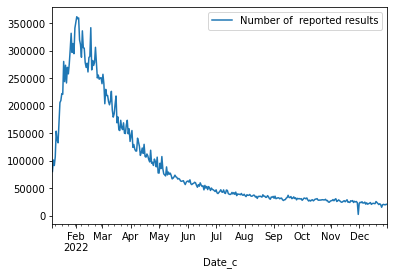

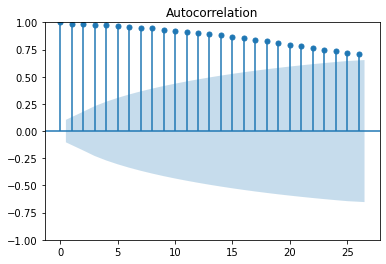

In [ ]:
import  matplotlib.pyplot as plt
df_new.plot() 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_new).show() 

In [ ]:
from statsmodels.tsa.stattools import adfuller as ADF
 
 
def tagADF(t):
    result = pd.DataFrame(index=[
            "Test Statistic Value", "p-value", "Lags Used", 
            "Number of Observations Used", 
            "Critical Value(1%)", "Critical Value(5%)", "Critical Value(10%)"
        ], columns=['Number of  reported results']
    );
    result['Number of  reported results']['Test Statistic Value'] = t[0]
    result['Number of  reported results']['p-value'] = t[1]
    result['Number of  reported results']['Lags Used'] = t[2]
    result['Number of  reported results']['Number of Observations Used'] = t[3]
    result['Number of  reported results']['Critical Value(1%)'] = t[4]['1%']
    result['Number of  reported results']['Critical Value(5%)'] = t[4]['5%']
    result['Number of  reported results']['Critical Value(10%)'] = t[4]['10%']
    return result;


 

print('primitive ADF result:',tagADF(ADF(df_new['Number of  reported results'])))  # 添加标签后展现
 
# 平稳判断：得到统计量大于三个置信度(1%,5%,10%)临界统计值，p值显著大于0.05，该序列为非平稳序列。
# 备注：得到的统计量显著小于3个置信度（1%，5%，10%）的临界统计值时，为平稳 此时p值接近于0 此处不为0，尝试增加数据量，原数据太少
# 2 进行数据差分，一般一阶差分就可以

primitive ADF result:                             Number of  reported results
Test Statistic Value                          -3.866706
p-value                                        0.002294
Lags Used                                            17
Number of Observations Used                         341
Critical Value(1%)                            -3.449673
Critical Value(5%)                            -2.870053
Critical Value(10%)                           -2.571306


/Users/leonard_shi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/leonard_shi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/leonard_shi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26597 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/leonard_shi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0, flags=flags)


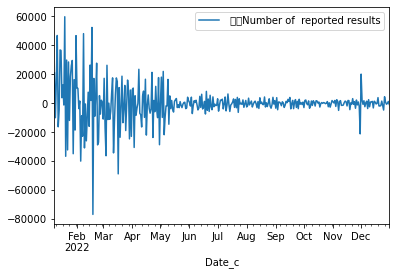

查分Number of  reported results
Date_c                                    
2022-01-08                         20873.0
2022-01-09                        -10026.0
2022-01-10                         15657.0
2022-01-11                         46746.0
2022-01-12                        -16294.0
...                                    ...
2022-12-27                           868.0
2022-12-28                          -719.0
2022-12-29                          -159.0
2022-12-30                          1203.0
2022-12-31                          -824.0

[358 rows x 1 columns]

In [ ]:

D_data.columns = [u' 查分Number of  reported results']
 
#差分图趋势查看

 
D_data.plot() 
plt.show()
D_data

/Users/leonard_shi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


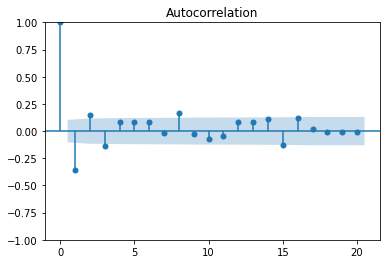

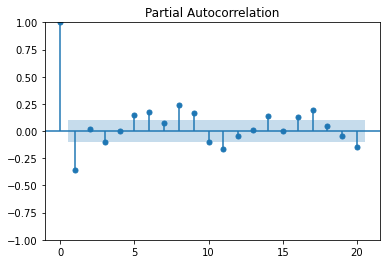

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(D_data, lags=20)
plot_pacf(D_data, lags=20)
plt.show()

<ipython-input-59-265a94e760a4>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(D_data).show()


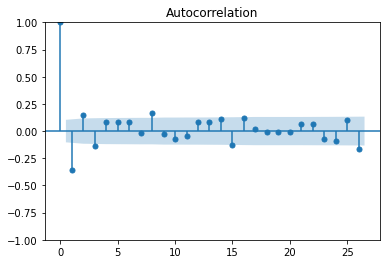

In [ ]:
plot_acf(D_data).show()
 
plt.show()

<ipython-input-60-e00bb8b9aee0>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(D_data).show()


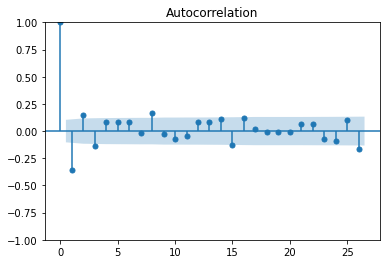

In [ ]:
# 附加：查看自相关系数合片自相关系数（查分之后），可以用于平稳性的检测，也可用于定阶系数预估
 
#自相关图
 
plot_acf(D_data).show()
 
plt.show()

差分序列的ADF检验结果为：                             Number of  reported results
Test Statistic Value                          -4.241785
p-value                                        0.000559
Lags Used                                            17
Number of Observations Used                         340
Critical Value(1%)                             -3.44973
Critical Value(5%)                            -2.870079
Critical Value(10%)                           -2.571319


/Users/leonard_shi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
<ipython-input-61-e4552d4aa5dc>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(D_data).show()


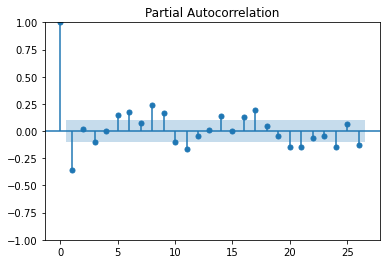

In [ ]:
#偏自相关图
 
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(D_data).show()
print(u'差分序列的ADF检验结果为：', tagADF(ADF(D_data[u'Number of  reported results']))) 

In [ ]:
# 4 白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
 
#返回统计量和p值
 
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(D_data, lags=1))

差分序列的白噪声检验结果为：      lb_stat     lb_pvalue
1  46.991745  7.128632e-12


In [ ]:
# 5 p，q定阶
import statsmodels.api as sm
 
#一般阶数不超过length/10
 
pmax = int(len(D_data)/10) 
 
 
#一般阶数不超过length/10
 
qmax = int(len(D_data)/10) 
 
#bic矩阵
 
bic_matrix = [] 
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
#存在部分报错，所以用try来跳过报错。
        try: 
            tmp.append(sm.tsa.arima.ARIMA(data, (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    print(tmp)
    bic_matrix.append(tmp)
    print(bic_matrix)
    
    
 
#从中可以找出最小值
 
bic_matrix = pd.DataFrame(bic_matrix) 
 
#先用stack展平，然后用idxmin找出最小值位置。
 
p,q = bic_matrix.stack().idxmin() 
 
 
 
print(u'BIC最小的p值和q值为：%s、%s' %(p,q))
# 取BIC信息量达到最小的模型阶数，结果p为0，q为1，定阶完成。

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
[[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
[[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

TypeError: reduction operation 'argmin' not allowed for this dtype

In [ ]:
df_new.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 359 entries, 2022-01-07 to 2022-12-31
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Number of  reported results  359 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [ ]:
# 6 建立模型和预测
# print(df_new)
# print(df_new['Number of  reported results'])
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df_new['Number of  reported results'], order = (1,1,1))
model1 = model.fit()
 
#给出一份模型报告
 
model1.summary() 
 
#作为期5天的预测，返回预测结果、标准误差、置信区间。
 
model1.forecast(60)

/Users/leonard_shi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/leonard_shi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/leonard_shi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-01-01    20649.573652
2023-01-02    20547.646759
2023-01-03    20586.185731
2023-01-04    20571.613989
2023-01-05    20577.123624
2023-01-06    20575.040409
2023-01-07    20575.828081
2023-01-08    20575.530259
2023-01-09    20575.642867
2023-01-10    20575.600289
2023-01-11    20575.616388
2023-01-12    20575.610301
2023-01-13    20575.612602
2023-01-14    20575.611732
2023-01-15    20575.612061
2023-01-16    20575.611937
2023-01-17    20575.611984
2023-01-18    20575.611966
2023-01-19    20575.611973
2023-01-20    20575.611970
2023-01-21    20575.611971
2023-01-22    20575.611971
2023-01-23    20575.611971
2023-01-24    20575.611971
2023-01-25    20575.611971
2023-01-26    20575.611971
2023-01-27    20575.611971
2023-01-28    20575.611971
2023-01-29    20575.611971
2023-01-30    20575.611971
2023-01-31    20575.611971
2023-02-01    20575.611971
2023-02-02    20575.611971
2023-02-03    20575.611971
2023-02-04    20575.611971
2023-02-05    20575.611971
2023-02-06    20575.611971
2

In [ ]:
df.loc[:, ['1 try', '2 tries', '3 tries', '4 tries', '5 tries', '6 tries', '7 or more tries']] = df.loc[:, ['1 try', '2 tries', '3 tries', '4 tries', '5 tries', '6 tries', '7 or more tries']].div(100)
df


Date_c  Contest number   Word  Number of  reported results  \
0   2022-12-31             560  manly                        20380   
1   2022-12-30             559  molar                        21204   
2   2022-12-29             558  havoc                        20001   
3   2022-12-28             557  impel                        20160   
4   2022-12-27             556  condo                        20879   
..         ...             ...    ...                          ...   
354 2022-01-11             206  drink                       153880   
355 2022-01-10             205  query                       107134   
356 2022-01-09             204  gorge                        91477   
357 2022-01-08             203  crank                       101503   
358 2022-01-07             202  slump                        80630   

     Number in hard mode  1 try  2 tries  3 tries  4 tries  5 tries  6 tries  \
0                   1899   0.00     0.02     0.17     0.37     0.29     0.12   
1                   1973   0.00     0.04     0.21     0.38     0.26     0.09   
2                   1919   0.00     0.02     0.16     0.38     0.30     0.12   
3                   1937   0.00     0.03     0.21     0.40     0.25     0.09   
4                   2012   0.00     0.02     0.17     0.35     0.29     0.14   
..                   ...    ...      ...      ...      ...      ...      ...   
354                 3017   0.01     0.09     0.35     0.34     0.16     0.05   
355                 2242   0.01     0.04     0.16     0.30     0.30     0.17   
356                 1913   0.01     0.03     0.13     0.27     0.30     0.22   
357                 1763   0.01     0.05     0.23     0.31     0.24     0.14   
358                 1362   0.01     0.03     0.23     0.39     0.24     0.09   

     7 or more tries  
0               0.02  
1               0.01  
2               0.02  
3               0.01  
4               0.03  
..               ...  
354             0.01  
355             0.02  
356             0.04  
357             0.02  
358             0.01  

[359 rows x 12 columns]

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='MCM Report', explorative = True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file('test1.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]